
--- Dataset ---
              Player  Matches  Runs  Average  StrikeRate  Fours  Sixes
0      Sai Sudharsan       15   759    54.21      156.17     85     25
1       Shubman Gill       15   650    50.00      155.87     70     22
2   Suryakumar Yadav       16   717    65.18      167.91     80     28
3        Virat Kohli       15   657    54.75      144.71     60     20
4    Ruturaj Gaikwad       15   590    49.16      145.09     75     21
5           KL Rahul       14   560    46.67      139.28     68     18
6       Sanju Samson       14   552    47.83      155.31     65     19
7        Rinku Singh       13   480    40.00      159.87     55     15
8   Heinrich Klaasen       12   462    42.00      180.52     48     25
9    Nicholas Pooran       13   440    39.50      172.18     45     23
10       Travis Head       12   567    51.54      191.23     75     32
11   Abhishek Sharma       12   521    43.41      189.43     72     31

--- Model Evaluation ---
RMSE: 73.54
R² Score: 0.66
Accurac

c:\Users\mypc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127951 (\N{CRICKET BAT AND BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


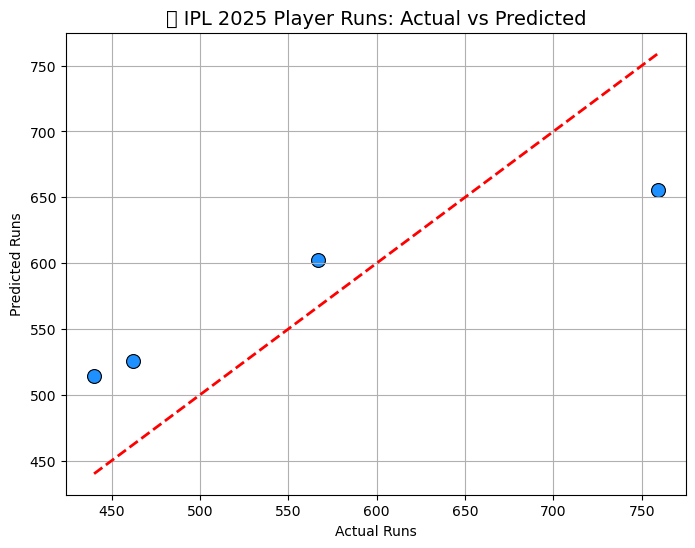

C:\Users\mypc\AppData\Local\Temp\ipykernel_11324\3622709523.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='viridis')


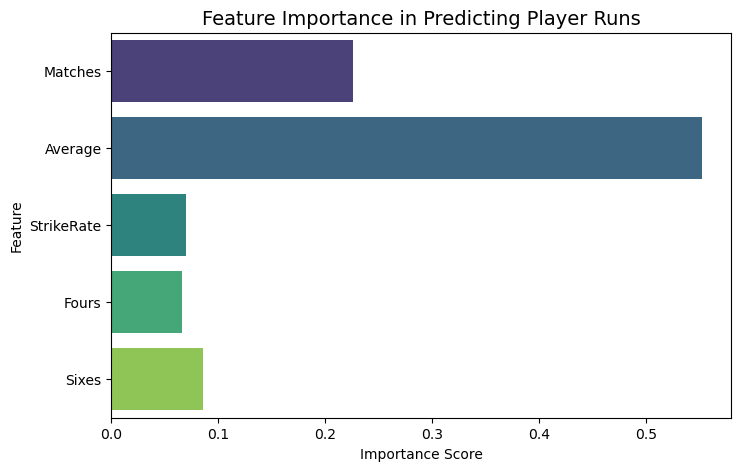

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# --- 1. Create dataset 
data = {
    'Player': [
        'Sai Sudharsan', 'Shubman Gill', 'Suryakumar Yadav', 'Virat Kohli',
        'Ruturaj Gaikwad', 'KL Rahul', 'Sanju Samson', 'Rinku Singh',
        'Heinrich Klaasen', 'Nicholas Pooran', 'Travis Head', 'Abhishek Sharma'
    ],
    'Matches': [15, 15, 16, 15, 15, 14, 14, 13, 12, 13, 12, 12],
    'Runs': [759, 650, 717, 657, 590, 560, 552, 480, 462, 440, 567, 521],
    'Average': [54.21, 50.00, 65.18, 54.75, 49.16, 46.67, 47.83, 40.00, 42.00, 39.50, 51.54, 43.41],
    'StrikeRate': [156.17, 155.87, 167.91, 144.71, 145.09, 139.28, 155.31, 159.87, 180.52, 172.18, 191.23, 189.43],
    'Fours': [85, 70, 80, 60, 75, 68, 65, 55, 48, 45, 75, 72],
    'Sixes': [25, 22, 28, 20, 21, 18, 19, 15, 25, 23, 32, 31]
}

df = pd.DataFrame(data)
print("\n--- Dataset ---")
print(df)

# --- 2. Features and Target ---
X = df[['Matches', 'Average', 'StrikeRate', 'Fours', 'Sixes']]
y = df['Runs']

# --- 3. Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- 4. Train model ---
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- 5. Predict ---
y_pred = model.predict(X_test)

# --- 6. Evaluation metrics ---
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Define "accuracy" and "precision" for regression
# Accuracy = 100 - (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracy = 100 - mape

# Precision = 100 - (Standard deviation of percentage errors)
precision = 100 - np.std(np.abs((y_test - y_pred) / y_test) * 100)

# --- 7. Display results ---
print("\n--- Model Evaluation ---")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")

# --- 8. Visualization ---
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, s=100, color='dodgerblue', edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("🏏 IPL 2025 Player Runs: Actual vs Predicted", fontsize=14)
plt.xlabel("Actual Runs")
plt.ylabel("Predicted Runs")
plt.grid(True)
plt.show()

# --- 9. Feature importance visualization ---
importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title("Feature Importance in Predicting Player Runs", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()
